In [52]:
#initial import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import normaltest

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

#Analysing the data

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [9]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [14]:
df.shape

(1000, 8)

In [15]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
for column in [i for i in df.columns if df[i].dtypes == 'O']:
    df[column] = df[column].astype('category')

In [27]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [33]:
#Finding missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
#Finding duplicate values

df.duplicated().sum()

0

In [40]:
#Finding the unique value on whole data frame

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [42]:
#Get unique values of a column

df['gender'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [45]:
# Checking corelation

df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [49]:
#Checking covariance

df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [50]:
#Checking the skewness

df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='reading score', ylabel='Density'>

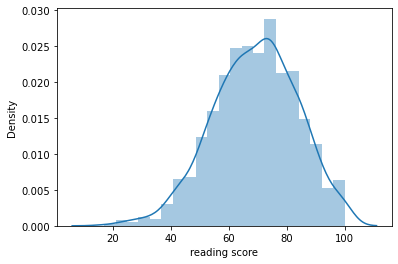

In [55]:
#Plotting of distribution
#Types of distribution: Normal, Uniform, lognormal, normal, poision

sns.distplot(df['reading score'])

In [61]:
#Performing own statistics and adding column

df['average'] = (df['math score']+df['reading score']+df['writing score'])/3

In [73]:
#Finding average by gender

df.groupby(['gender'])['math score'].mean()

gender
female    32962
male      33127
Name: math score, dtype: int64

In [81]:
#Find the no.of students less than 30 marks

df[df['math score'] < 30].count()

gender                         76
race/ethnicity                 76
parental level of education    76
lunch                          76
test preparation course        76
math score                     76
reading score                  76
writing score                  76
average                        76
dtype: int64

In [83]:
# Calculating p values
df_scores = df[['math score', 'reading score', 'writing score']]
normaltest(df_scores['math score'])[1]*100

#if p value is greater than 0.05 normally distributed else not 

<AxesSubplot:xlabel='math score', ylabel='Density'>

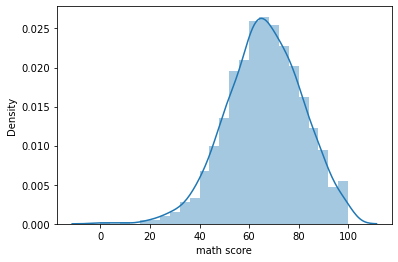

In [91]:
# Cross validating p value with distribution plot
sns.distplot(df_scores['math score'])

In [101]:
# How to check the outlier

# Step1: IQR = Q3 - Q1
# Step2: Upper fence = Q3 + 1.5 * IQR
# Step3: Lower fence = Q1 - 1.5 * IQR

# Graphs used: Box plot, Violin plot

39.0
(144.5, -11.5)


In [136]:
#Programtical approach of fetching IQR, lower fence, upper fence
def get_outliers(df, column_name, q1_range=0.25, q3_range=0.75):
    """
    df = pandas data frame,
    column_name = name of the column,
    q1 = qurantile 1,
    q3 = qurantile 3
    """
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence

In [138]:
_, upper_fence, lower_fence = get_outliers(df, 'math score')

In [133]:
print("lesser than lower fence") 
df[df['math score'] < lower_fence]

lesser than lower fence


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [134]:
print("greater than upper fence")
df[df['math score']> upper_fence]

greater than upper fence


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [135]:
# remove the outliers from lower and upper fence

<AxesSubplot:>

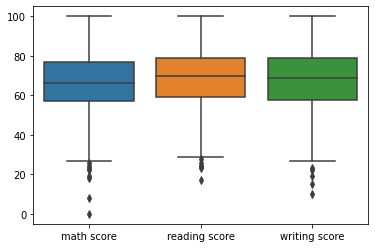

In [95]:
sns.boxplot(data=df_scores[['math score', 'reading score', 'writing score']])

<AxesSubplot:>

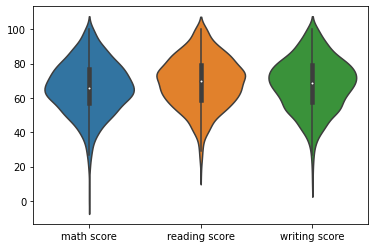

In [96]:
sns.violinplot(data=df_scores[['math score', 'reading score', 'writing score']])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

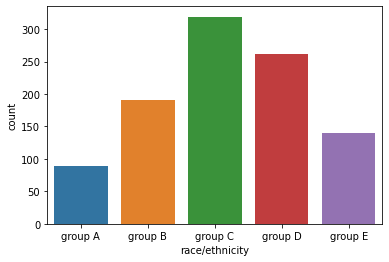

In [139]:
sns.countplot(df['race/ethnicity'])

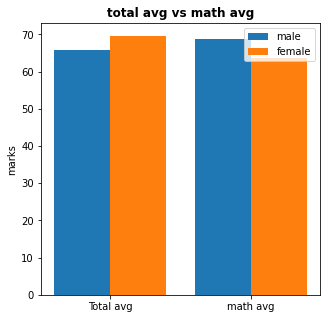

In [161]:
plt.figure(figsize=(5,5))
df_gender = df.groupby(['gender'])['math score', 'average'].mean()
X=['Total avg','math avg']
female_score=df_gender['average'][0],df_gender['math score'][0]
male_score=df_gender['average'][1],df_gender['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()



,math score,average
gender,,
female,63.633205,69.569498
male,68.728216,65.837483


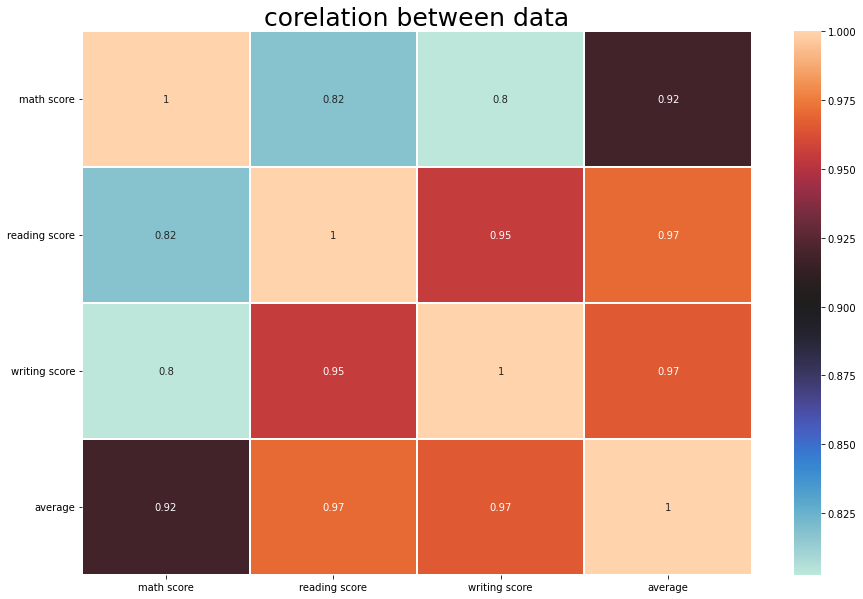

In [153]:
sns.heatmap(df.corr(), annot=True, cmap='icefire', linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("corelation between data", color='black', size=25)
plt.show()